In [17]:
!pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [7]:
import re
import string

In [8]:
data["tweet"].head()

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

convert uppercase to lowercase

In [9]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data["tweet"].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [11]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [12]:
data["tweet"].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove punctuations

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)    

In [15]:
data["tweet"].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [16]:
data["tweet"].tail()

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove numbers

In [17]:
data["tweet"] = data["tweet"].str.replace(r'\d+', '', regex=True)

In [18]:
data["tweet"].tail()

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [19]:
!pip install nltk

In [19]:
import nltk

In [20]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [22]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [23]:
data["tweet"].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

stemming

In [24]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [25]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [26]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final a transpar silicon case thank to my uncl...
2    we love thi would you go talk makememori unplu...
3    im wire i know im georg i wa made that way iph...
4    what amaz servic appl wont even talk to me abo...
Name: tweet, dtype: object

In [27]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final a transpar silicon case thank to my uncl...
2,3,0,we love thi would you go talk makememori unplu...
3,4,0,im wire i know im georg i wa made that way iph...
4,5,1,what amaz servic appl wont even talk to me abo...
...,...,...,...
7915,7916,0,live out loud lol liveoutloud selfi smile soni...
7916,7917,0,we would like to wish you an amaz day make eve...
7917,7918,0,help my love year old neighbor with her ipad t...
7918,7919,0,final got my smart pocket wifi stay connect an...


### Building Vocabulary

In [28]:
from collections import Counter
vocab = Counter()

In [29]:
vocab

Counter()

In [30]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [31]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'my': 2273,
         'i': 2033,
         'the': 2007,
         'to': 1870,
         'samsung': 1395,
         'a': 1388,
         'and': 1255,
         'it': 1243,
         'new': 1137,
         'for': 1083,
         'phone': 1015,
         'me': 1000,
         'you': 958,
         'is': 894,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'on': 734,
         'of': 723,
         'in': 707,
         'thi': 678,
         'with': 602,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'so': 482,
         'have': 470,
         'like': 455,
         'just': 440,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'your': 399,
         'photo': 394,
         'at': 393,
         'now': 389,
         'that': 383,
         'get': 382,
         'io': 382,
         'all': 367,
         'galaxi': 361,
         's': 359,
         'an': 359,
         '

In [32]:
len(vocab)

16043

In [33]:
data.shape

(7920, 3)

In [34]:
tokens = [key for key in vocab if vocab[key] > 10]

In [35]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'a',
 'case',
 'thank',
 'to',
 'my',
 'yay',
 'soni',
 'xperia',
 's',
 'we',
 'love',
 'thi',
 'would',
 'you',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'i',
 'know',
 'wa',
 'made',
 'that',
 'way',
 'home',
 'what',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'me',
 'about',
 'question',
 'have',
 'pay',
 'them',
 'for',
 'their',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'up',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'again',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'when',
 'make',
 'ipod',
 'dont',
 'it',
 'color',
 'o

In [36]:
len(tokens)

1249

In [37]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')    

### Divide Dataset

In [38]:
x = data['tweet']
y = data['label']

In [65]:
!pip install scikit-learn

  Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl (8.7 MB)
Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl (38.5 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- ------------------

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [40]:
x_train

6520    finally～～find de white 小白 in da house！d new sa...
7078    level up kingcrowley king kushk ink iphon loud...
196     thing that make me read i just my pink eread f...
1631    noth like the wind in my fur iphonex k dog dog...
1238    i understand that ani data on thi product will...
                              ...                        
790     make me happi ps soni playstat untildawn game ...
2332    rachcon hahah i did the same thing with my ipo...
3283    so idk what up with io but first it delet all ...
168     hi world old photo followm likelik good dog so...
5166    show your with a regga one love doodl portabl ...
Name: tweet, Length: 6336, dtype: object

In [41]:
x_test

2688    yeay at last haha got it speechless samsung no...
1373    soloski primeban yup good thing i still have s...
7481    so im in the car with my mom and someon in the...
2632    fuck you appl youv made a phone that break if ...
7167    i snag a oneplu sticker combo for just ₹ onepl...
                              ...                        
2084    vivoindia unboxtherapi scamster advertis a sal...
5787    appl is give me the biggest anxieti attack of ...
6760    dear appl inc if you dont stop push out updat ...
1973    live laugh love godisgood bless instagood pico...
3347    quot of the day quot wisdom word smile follow ...
Name: tweet, Length: 1584, dtype: object

In [42]:
y_test

2688    0
1373    1
7481    1
2632    1
7167    0
       ..
2084    1
5787    1
6760    1
1973    0
3347    0
Name: label, Length: 1584, dtype: int64

### Vectorization

In [43]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new

In [44]:
vectorized_x_train = vectorizer(x_train, tokens)

In [45]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1249), dtype=float32)

for i in vectorized_x_train[0]:
    print(i)

In [46]:
vectorized_x_test = vectorizer(x_test, tokens)

In [47]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1249), dtype=float32)

In [48]:
y_train

6520    0
7078    0
196     0
1631    0
1238    0
       ..
790     0
2332    0
3283    1
168     0
5166    0
Name: label, Length: 6336, dtype: int64

In [49]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1249), dtype=float32)

In [50]:
y_test

2688    0
1373    1
7481    1
2632    1
7167    0
       ..
2084    1
5787    1
6760    1
1973    0
3347    0
Name: label, Length: 1584, dtype: int64

In [51]:
y_train.value_counts()

label
0    4719
1    1617
Name: count, dtype: int64

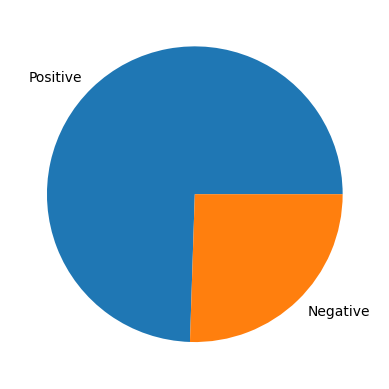

In [52]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle imbalanced dataset

In [61]:
!pip install imbalanced-learn

In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9438, 1249) (9438,)


In [54]:
y_train_smote.value_counts()

label
0    4719
1    4719
Name: count, dtype: int64

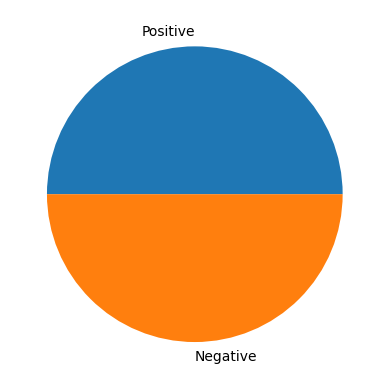

In [55]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [56]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9438, 1249), dtype=float32)

In [57]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9433    1
9434    1
9435    1
9436    1
9437    1
Name: label, Length: 9438, dtype: int64

In [58]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1249), dtype=float32)

In [59]:
y_test

2688    0
1373    1
7481    1
2632    1
7167    0
       ..
2084    1
5787    1
6760    1
1973    0
3347    0
Name: label, Length: 1584, dtype: int64

### Model Training and Evaluation

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [79]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')    

In [80]:
from sklearn.model_selection import cross_val_score

### Logistic Regression

In [92]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.946
	Precision = 0.924
	Recall = 0.973
	F1-Score = 0.948
Testing Scores:
	Accuracy = 0.891
	Precision = 0.754
	Recall = 0.861
	F1-Score = 0.804


### Naive Bayes

In [93]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.908
	Precision = 0.863
	Recall = 0.971
	F1-Score = 0.914
Testing Scores:
	Accuracy = 0.884
	Precision = 0.705
	Recall = 0.949
	F1-Score = 0.809


### Decision Tree

In [94]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.828
	Precision = 0.676
	Recall = 0.643
	F1-Score = 0.659


### Random Forest

In [95]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.884
	Precision = 0.794
	Recall = 0.743
	F1-Score = 0.768


### Support Vector Machine

In [96]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.985
	Precision = 0.974
	Recall = 0.997
	F1-Score = 0.985
Testing Scores:
	Accuracy = 0.904
	Precision = 0.786
	Recall = 0.863
	F1-Score = 0.823


In [98]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)